In [1]:
# import the necessary libraries
import numpy as np 
import pandas as pd 
import requests
import json
from datetime import date, timedelta, datetime

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the data
res = requests.get("https://api.covid19india.org/raw_data.json")

j = res.json()

df = pd.DataFrame(j["raw_data"])
df.shape

(3012, 20)

In [3]:
# filter relevant data
df = df[df["dateannounced"]!= '' ]

# change date format
df['dateannounced'] = pd.to_datetime(df['dateannounced'], format='%d/%m/%Y')

# filter relevant data
sdate = datetime.strptime('2020-03-01' , '%Y-%m-%d')
df = df[df['dateannounced']>sdate.strftime('%Y-%m-%d')]
df.shape

(2564, 20)

In [4]:
print('Total Detected  ' + str(df['currentstatus'].count()))
print('-------------------')
print(df['currentstatus'].value_counts())

Total Detected  2564
-------------------
Hospitalized    2473
Recovered         68
Deceased          22
Migrated           1
Name: currentstatus, dtype: int64


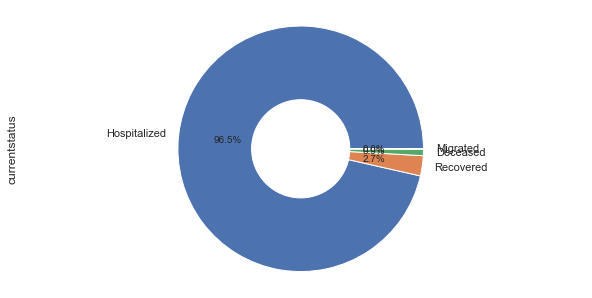

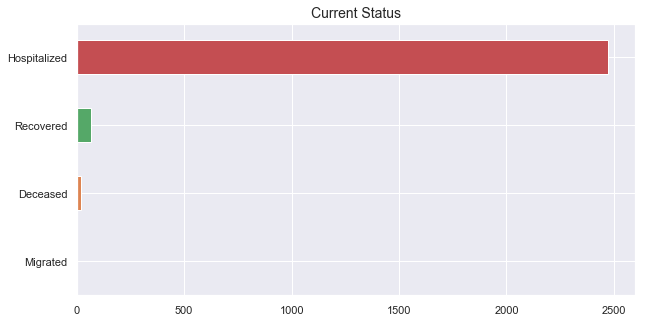

In [5]:
col = 'currentstatus'

# charts of current status

# pie plot for current status
fig1, ax1 = plt.subplots(figsize=(10,5))
#ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,5))
ax1.axis('equal')

#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# bar plot for current status
fig2, ax2 = plt.subplots(figsize=(10,5))
df[col].value_counts(ascending=True).plot(kind='barh', figsize=(10,5))
plt.title('Current Status', fontsize=14)

plt.show()

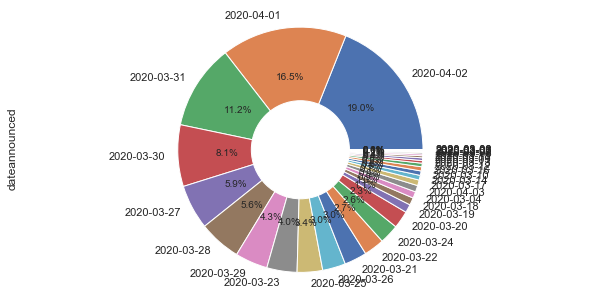

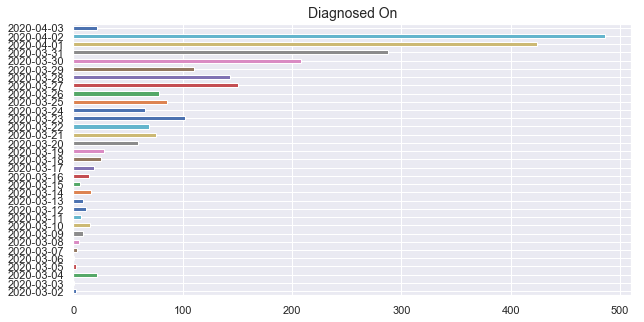

In [6]:
df["dateannounced"] = pd.to_datetime(df["dateannounced"]).dt.date

col = 'dateannounced'

# charts of diagnosed date

# pie plot for diagnosed date
fig1, ax1 = plt.subplots(figsize=(10,5))
#ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,5))
ax1.axis('equal')

#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# bar plot for diagnosed date
fig2, ax2 = plt.subplots(figsize=(10,5))
df[col].value_counts().sort_index().plot(kind='barh', figsize=(10,5))
plt.title('Diagnosed On', fontsize=14)
plt.show()


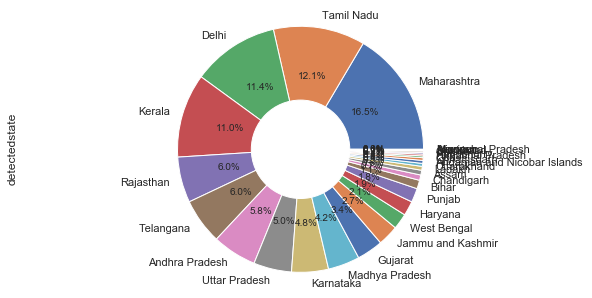

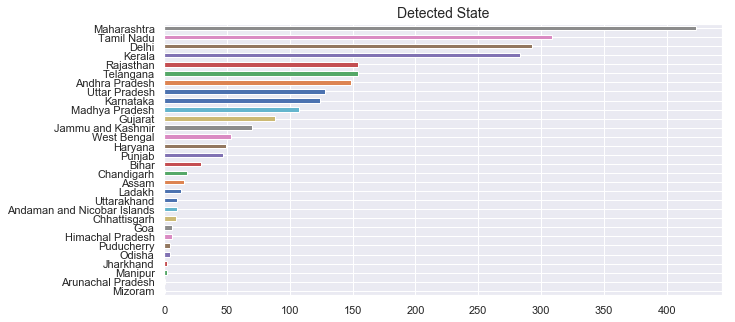

In [7]:
col = 'detectedstate'

# charts of detected state

# pie plot for detected state
fig1, ax1 = plt.subplots(figsize=(10,5))
#ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,5))
ax1.axis('equal')

#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# bar plot for detected state
fig2, ax2 = plt.subplots(figsize=(10,5))
df[col].value_counts(ascending=True).plot(kind='barh', figsize=(10,5))
plt.title('Detected State', fontsize=14)
plt.show()

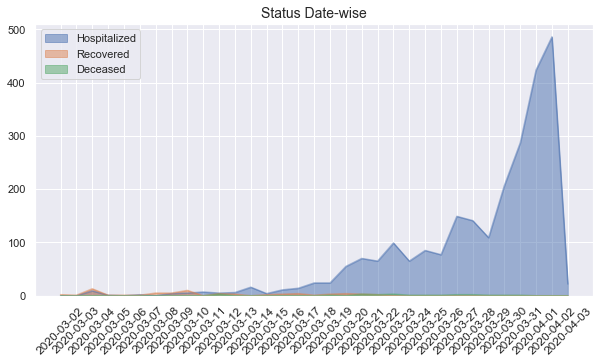

In [8]:
# status date-wise data prep
tmp = pd.concat([pd.DataFrame(df['dateannounced'].value_counts().sort_index()),
           pd.DataFrame(df[df['currentstatus'] == 'Hospitalized']['dateannounced'].value_counts().sort_index()),
           pd.DataFrame(df[df['currentstatus'] == 'Recovered']['dateannounced'].value_counts().sort_index()), 
           pd.DataFrame(df[df['currentstatus'] == 'Deceased']['dateannounced'].value_counts().sort_index())], 
          axis=1).fillna(0).astype('int32')
tmp.columns = ['Overall','Hospitalized','Recovered','Deceased']

cols = ['Hospitalized','Recovered','Deceased']

tmp = tmp[cols]

# status date-wise 
tmp.plot.area(stacked=False, figsize=(10,5))

plt.xticks(tmp.index, fontsize=12, rotation=45)
plt.title('Status Date-wise', fontsize=14)
plt.show()

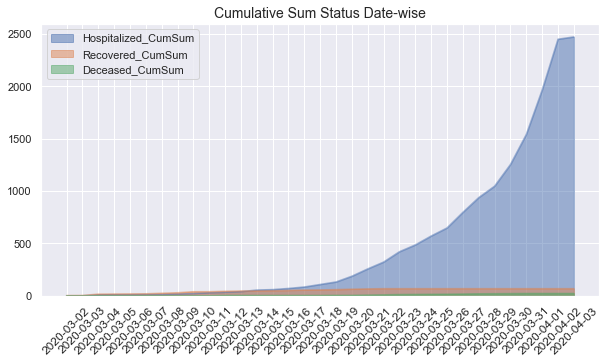

In [9]:
# cumulative sum data prep
tmp_cumsum = pd.DataFrame()
tmp_cumsum['Hospitalized_CumSum'] = tmp['Hospitalized'].cumsum()
tmp_cumsum['Recovered_CumSum'] = tmp['Recovered'].cumsum()
tmp_cumsum['Deceased_CumSum'] = tmp['Deceased'].cumsum()

# Cumulative Sum Detected by States
tmp_cumsum.plot.area(stacked=False, figsize=(10,5))

plt.xticks(tmp.index, fontsize=12, rotation=45)
plt.title('Cumulative Sum Status Date-wise', fontsize=14)
plt.show()

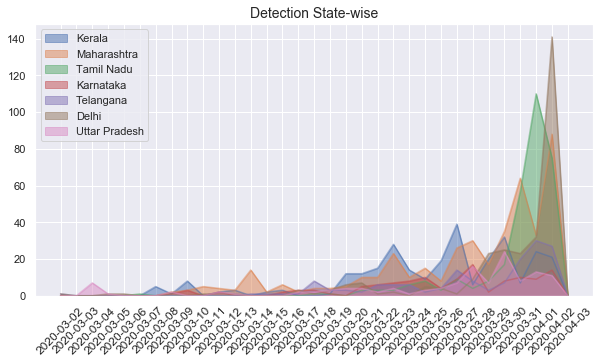

In [10]:
# state-wise data prep
tmp = pd.concat([pd.DataFrame(df['dateannounced'].value_counts().sort_index()),
           pd.DataFrame(df[df['detectedstate'] == 'Kerala']['dateannounced'].value_counts().sort_index()),
           pd.DataFrame(df[df['detectedstate'] == 'Maharashtra']['dateannounced'].value_counts().sort_index()), 
           pd.DataFrame(df[df['detectedstate'] == 'Tamil Nadu']['dateannounced'].value_counts().sort_index()),
           pd.DataFrame(df[df['detectedstate'] == 'Karnataka']['dateannounced'].value_counts().sort_index()),                  
           pd.DataFrame(df[df['detectedstate'] == 'Telangana']['dateannounced'].value_counts().sort_index()), 
           pd.DataFrame(df[df['detectedstate'] == 'Delhi']['dateannounced'].value_counts().sort_index()), 
           pd.DataFrame(df[df['detectedstate'] == 'Uttar Pradesh']['dateannounced'].value_counts().sort_index())], 
          axis=1).fillna(0).astype('int32')
tmp.columns = ['Overall','Kerala','Maharashtra','Tamil Nadu','Karnataka','Telangana','Delhi','Uttar Pradesh']

cols = ['Kerala','Maharashtra','Tamil Nadu','Karnataka','Telangana','Delhi','Uttar Pradesh']

tmp = tmp[cols]

# Detection State-wise
tmp.plot.area(stacked=False, figsize=(10,5))

plt.xticks(tmp.index, fontsize=12, rotation=45)
plt.title('Detection State-wise', fontsize=14)
plt.show()

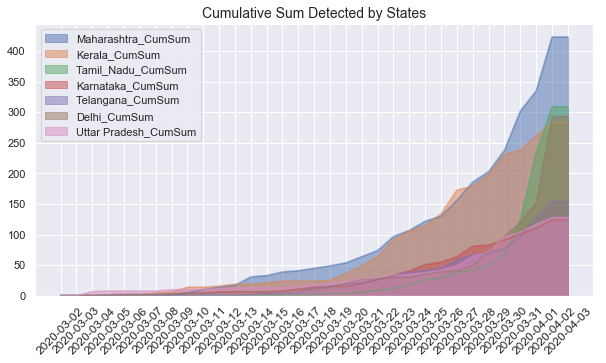

In [11]:
# cumulative sum data prep
tmp_cumsum = pd.DataFrame()
#tmp_cumsum['Overall_CumSum'] = tmp['Overall'].cumsum()
tmp_cumsum['Maharashtra_CumSum'] = tmp['Maharashtra'].cumsum()
tmp_cumsum['Kerala_CumSum'] = tmp['Kerala'].cumsum()
tmp_cumsum['Tamil_Nadu_CumSum'] = tmp['Tamil Nadu'].cumsum()
tmp_cumsum['Karnataka_CumSum'] = tmp['Karnataka'].cumsum()
tmp_cumsum['Telangana_CumSum'] = tmp['Telangana'].cumsum()
tmp_cumsum['Delhi_CumSum'] = tmp['Delhi'].cumsum()
tmp_cumsum['Uttar Pradesh_CumSum'] = tmp['Uttar Pradesh'].cumsum()

# Cumulative Sum Detected by States
tmp_cumsum.plot.area(stacked=False, figsize=(10,5))

plt.xticks(tmp.index, fontsize=12, rotation=45)
plt.title('Cumulative Sum Detected by States', fontsize=14)
plt.show()

In [12]:
# replace blank spaces to null values
df = df.replace(r'^\s*$', np.nan, regex=True)

# correct age data
df['agebracket'] = df['agebracket'].replace('28-35', '32')
df['agebracket'] = pd.to_numeric(df['agebracket'])

# check missing data
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count', ascending=False)
missing_df

,column_name,missing_count
8,estimatedonsetdate,2564
15,source3,2411
1,backupnotes,2206
10,nationality,2142
17,statepatientnumber,2110
2,contractedfromwhichpatientsuspected,1863
0,agebracket,1798
5,detectedcity,1756
9,gender,1646
14,source2,1618


In [13]:
# treat age outliers
col = 'agebracket'
fmean = df[col].mean()
fstd = df[col].std()
df.ix[np.abs(df[col]-fmean) > (3*fstd), col] = fmean + (3*fstd)  # treat upper outliers
df.ix[np.abs(df[col]-fmean) < -(3*fstd), col] = -(fmean + (3*fstd)) # treat lower outliers

# missing age filled with median
df[col].fillna(df[col].median(), inplace=True) 

# mark missing data
df['gender'].fillna('NA', inplace=True) 
df['nationality'].fillna('India', inplace=True) 
df['detecteddistrict'].fillna('NA', inplace=True) 
df['detectedcity'].fillna('NA', inplace=True) 

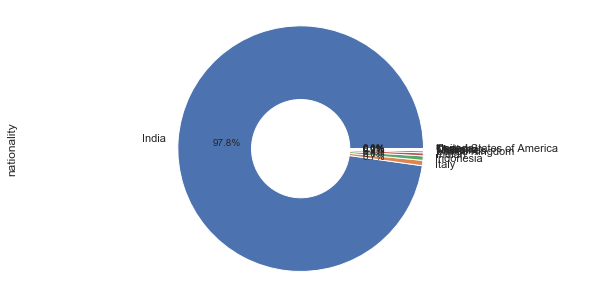

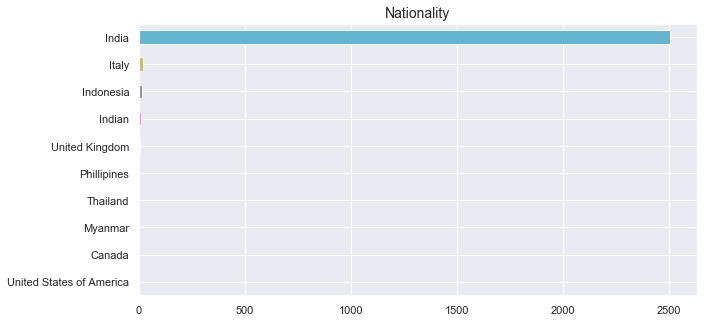

In [14]:
col = 'nationality'

# charts of nationality

# pie plot for nationality
fig1, ax1 = plt.subplots(figsize=(10,5))
#ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,5))
ax1.axis('equal')

#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# bar plot for nationality
fig2, ax2 = plt.subplots(figsize=(10,5))
df[col].value_counts(ascending=True).plot(kind='barh', figsize=(10,5))
plt.title('Nationality', fontsize=14)
plt.show()

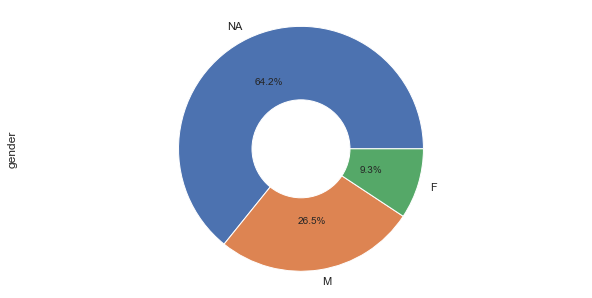

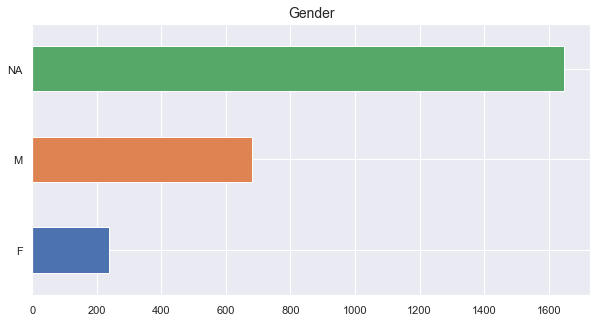

In [15]:
col = 'gender'

# charts of gender

# pie plot for gender
fig1, ax1 = plt.subplots(figsize=(10,5))
#ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,5))
ax1.axis('equal')

#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# bar plot for gender
fig2, ax2 = plt.subplots(figsize=(10,5))
df[col].value_counts(ascending=True).plot(kind='barh', figsize=(10,5))
plt.title('Gender', fontsize=14)
plt.show()

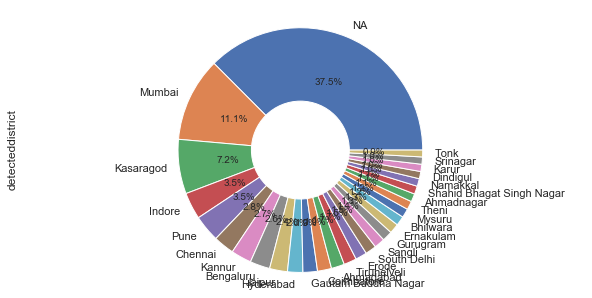

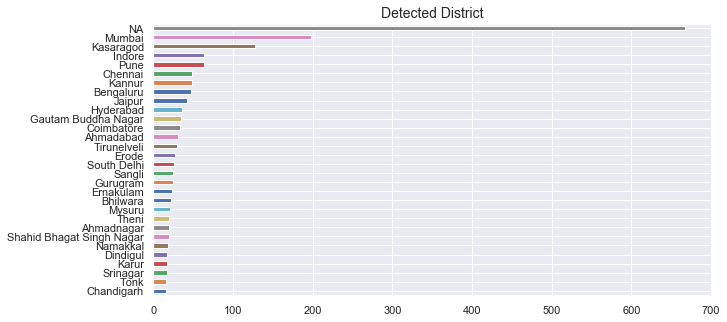

In [16]:
col = 'detecteddistrict'

# charts of detected district

# pie plot for detected district
fig1, ax1 = plt.subplots(figsize=(10,5))
#ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
df[col].value_counts()[0:29].plot(kind='pie', autopct='%1.1f%%', figsize=(10,5))
ax1.axis('equal')

#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# bar plot for detected district
fig2, ax2 = plt.subplots(figsize=(10,5))
df[col].value_counts(ascending=True)[-30:].plot(kind='barh', figsize=(10,5))
plt.title('Detected District', fontsize=14)
plt.show()

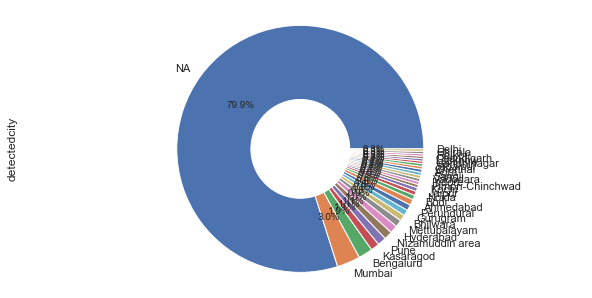

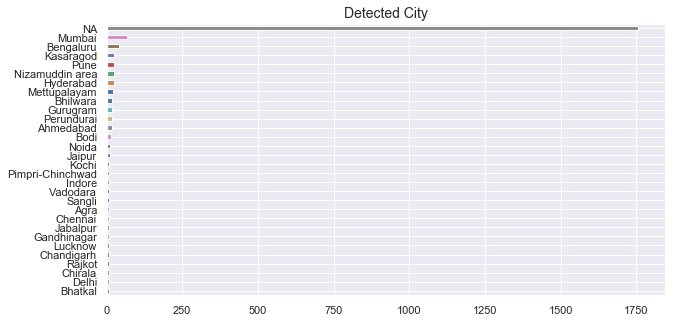

In [17]:
col = 'detectedcity'

# charts of detected city

# pie plot for detected city
fig1, ax1 = plt.subplots(figsize=(10,5))
#ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
df[col].value_counts()[0:29].plot(kind='pie', autopct='%1.1f%%', figsize=(10,5))
ax1.axis('equal')

#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# bar plot for detected city
fig2, ax2 = plt.subplots(figsize=(10,5))
df[col].value_counts(ascending=True)[-30:].plot(kind='barh', figsize=(10,5))
plt.title('Detected City', fontsize=14)
plt.show()

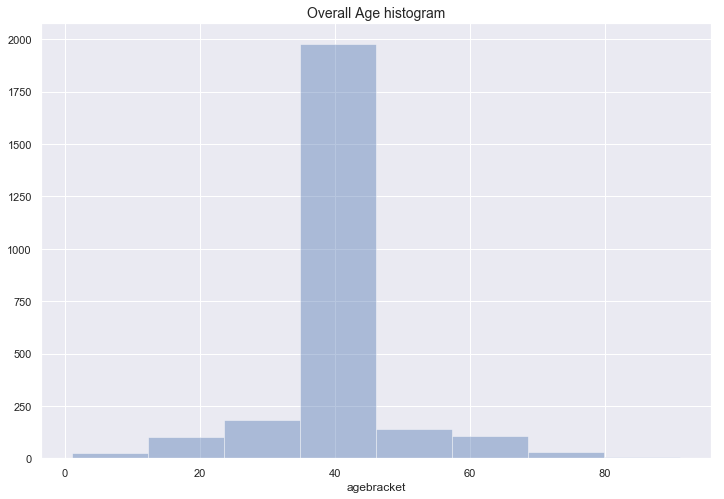

In [18]:
col = 'agebracket'
# age histogram
plt.figure(figsize=(12,8))
sns.distplot(df[col].values, bins=8, kde=False)
plt.xlabel(col, fontsize=12)
plt.title('Overall Age histogram', fontsize=14)
plt.show()

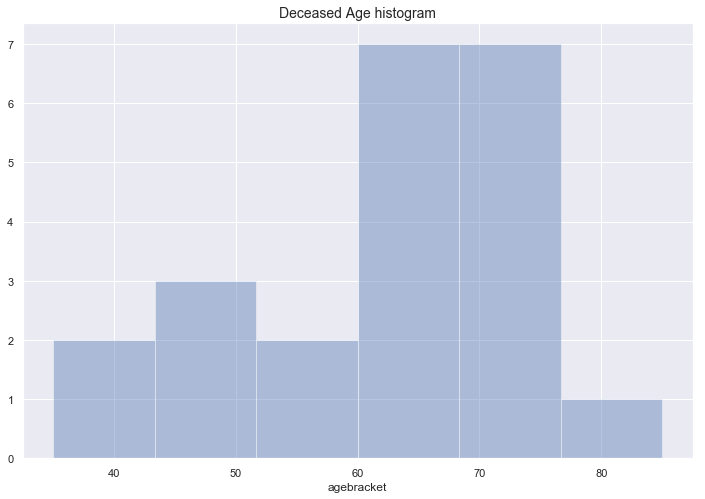

In [19]:
col1 = 'currentstatus'
col2 = 'agebracket'
tmp = df[df[col1] == 'Deceased']
plt.figure(figsize=(12,8))
sns.distplot(tmp[col2].values, bins=6, kde=False)
plt.xlabel(col2, fontsize=12)
plt.title('Deceased Age histogram', fontsize=14)
plt.show()

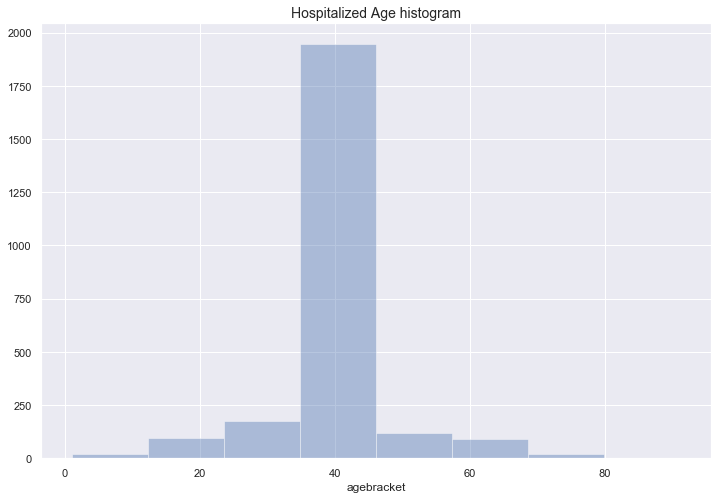

In [20]:
col1 = 'currentstatus'
col2 = 'agebracket'
tmp = df[df[col1] == 'Hospitalized']
plt.figure(figsize=(12,8))
sns.distplot(tmp[col2].values, bins=8, kde=False)
plt.xlabel(col2, fontsize=12)
plt.title('Hospitalized Age histogram', fontsize=14)
plt.show()

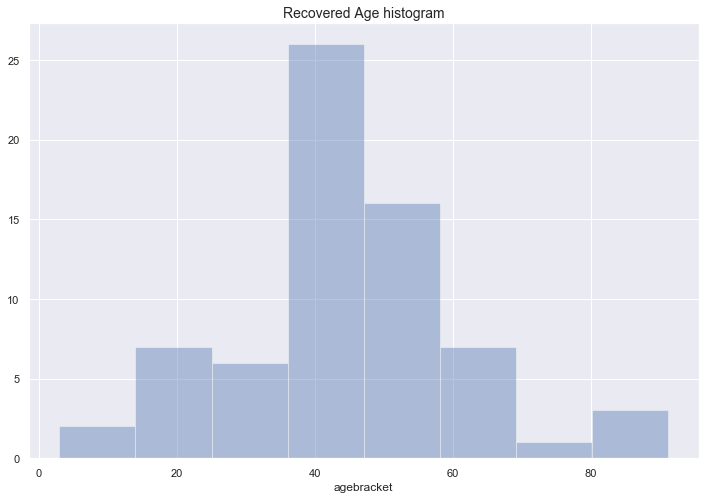

In [21]:
col1 = 'currentstatus'
col2 = 'agebracket'
tmp = df[df[col1] == 'Recovered']
plt.figure(figsize=(12,8))
sns.distplot(tmp[col2].values, bins=8, kde=False)
plt.xlabel(col2, fontsize=12)
plt.title('Recovered Age histogram', fontsize=14)
plt.show()